- ## Escolha do modelo
- ## Treinamento do modelo
- ## Teste do modelo
- ## Armazenamento do modelo

In [26]:
# maximiza nro de linhas e colunas para exibição
# inibe mensagens de warning
import pandas as pd
pd.set_option('display.max_rows', None) # permite a máxima visualização das linhas em um display
pd.set_option('display.max_columns', None) # permite a máxima visualização das colunas em um display
import warnings
warnings.simplefilter('ignore') # inibe a exibição de avisos de warning
warnings.filterwarnings('ignore') # inibe a exibição de avisos de warning

In [27]:
# modelos de classificação
from sklearn.linear_model import LogisticRegression # estimar a probabilidade de um determinado resultado com base em variáveis independentes
from sklearn.tree import DecisionTreeClassifier # usado tanto para classificação binária quanto multiclass, permitindo a previsão de rótulos variados
from sklearn.neighbors import KNeighborsClassifier # classificador que implementa o voto dos k-vizinhos mais próximos
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # classificador com uma fronteira de decisão linear, ajustando as densidades condicionais das classes aos dados e utilizando a regra de Bayes
from sklearn.naive_bayes import GaussianNB # algoritmo de classificação probabilístico que se baseia no teorema de Bayes
from sklearn.svm import SVC # utilizado para classificação, que baseia-se na criação de um hiperplano em um espaço de múltiplas dimensões para separar diferentes classes
from sklearn.neural_network import MLPClassifier # utiliza uma rede neural de múltiplas camadas, e é especialmente otimizado para a função de log-loss utilizando técnicas como LBFGS ou descida de gradiente estocástico
from sklearn.ensemble import AdaBoostClassifier # aprendizado supervisionado não paramétrico utilizado para classificação, que cria um modelo preditivo com base em classificadores simples
from sklearn.ensemble import GradientBoostingClassifier # cria um modelo aditivo de forma progressiva, permitindo a otimização de funções de perda diferenciáveis. É eficaz para problemas de classificação
from sklearn.ensemble import RandomForestClassifier # utiliza uma combinação de várias árvores de decisão para realizar tarefas de classificação, melhorando a precisão dos resultados
from sklearn.ensemble import ExtraTreesClassifier # classificador de árvores de decisão extremamente aleatórias, que se diferencia das árvores de decisão tradicionais ao construir múltiplas árvores de forma aleatória

In [28]:
# modelos de aprendizado profundo
from keras.models import Sequential # permite agrupar uma pilha linear de camadas em um modelo, facilitando a construção de redes neurais
from keras.layers import Dense # camada fundamental em redes neurais, onde cada neurônio está conectado a todos os neurônios da camada anterior, o que a torna amplamente utilizada em redes de múltiplas camadas
from keras.optimizers import SGD # otimizador usado em Keras que atualiza os parâmetros com base no gradiente e na taxa de aprendizado definida
from scikeras.wrappers import KerasClassifier # permite usar modelos Keras em bibliotecas como scikit-learn, facilitando a integração com técnicas como validação cruzada e ajuste de hiperparâmetros
from tensorflow.keras.optimizers import Adam # método de descida de gradiente estocástico que usa estimativas adaptativas de momentos de primeira e segunda ordem

In [29]:
# análise de dados e avaliação dos modelos
from sklearn.model_selection import train_test_split # utilizada para dividir conjuntos de dados em subconjuntos de treino e teste, ajudando na validação de modelos
from sklearn.model_selection import KFold # técnica de validação cruzada que divide um conjunto de dados em 'k' subconjuntos (folds) para treinar e testar modelos, garantindo que cada exemplo seja usado para treinamento e teste
from sklearn.model_selection import cross_val_score # avalia o desempenho de um estimador usando validação cruzada. Ela divide os dados em k partes e treina o modelo k vezes
from sklearn.model_selection import GridSearchCV # realizar uma busca exaustiva sobre combinações de parâmetros especificados para um estimador. Ele ajuda a otimizar o desempenho do modelo
from sklearn.metrics import confusion_matrix # tabela que é usada em problemas de classificação para avaliar onde ocorreram erros no modelo, com as linhas representando as classes reais e as colunas as classes previstas
from sklearn.metrics import accuracy_score # métrica utilizada para avaliar o desempenho de modelos de classificação, representando a fração de previsões corretas em relação ao total de previsões feitas

In [30]:
# preparação e visualização de dados
import numpy as np # computação de matrizes
from matplotlib import pyplot # plotagem gráfica
import seaborn as sns # plotagem gráfica

In [31]:
# carregando arquivo tratado em dataframe
df_fraud = pd.read_csv('df_treated/df_fraud.csv')

In [32]:
# conferindo a dimensão do dataframe, linhas e colunas
df_fraud.shape

(283726, 18)

In [33]:
# ordenando pelo index o dataframe carregado
df_fraud = df_fraud.sort_index()

In [34]:
# reconhecendo as primeiras linhas do dataframe
df_fraud.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V14,V16,V17,V18,V19,Class
0,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,0.09,-0.55,-0.62,-0.31,-0.47,0.21,0.03,0.40,0
1,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,-0.17,1.61,1.07,-0.14,0.46,-0.11,-0.18,-0.15,0
2,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,0.21,0.62,0.07,-0.17,-2.89,1.11,-0.12,-2.26,0
3,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,-0.05,-0.23,0.18,-0.29,-1.06,-0.68,1.97,-1.23,0
4,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,0.75,-0.82,0.54,-1.12,-0.45,-0.24,-0.04,0.80,0


- Observe que os nomes das variáveis não são identificáveis, isso para que a administradora de cartões mantenha sigilo dos dados de seus clientes.
- Observe também que o que nos importa são somente os valores e variações das variáveis para cada transação, não importando o significado de cada uma.

In [35]:
# verificando a posição de cada variável
df_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283726 entries, 0 to 283725
Data columns (total 18 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      283726 non-null  float64
 1   V2      283726 non-null  float64
 2   V3      283726 non-null  float64
 3   V4      283726 non-null  float64
 4   V5      283726 non-null  float64
 5   V6      283726 non-null  float64
 6   V7      283726 non-null  float64
 7   V8      283726 non-null  float64
 8   V9      283726 non-null  float64
 9   V10     283726 non-null  float64
 10  V11     283726 non-null  float64
 11  V12     283726 non-null  float64
 12  V14     283726 non-null  float64
 13  V16     283726 non-null  float64
 14  V17     283726 non-null  float64
 15  V18     283726 non-null  float64
 16  V19     283726 non-null  float64
 17  Class   283726 non-null  int64  
dtypes: float64(17), int64(1)
memory usage: 39.0 MB


In [36]:
# lista nomes das variáveis
list(df_fraud.columns)

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V14',
 'V16',
 'V17',
 'V18',
 'V19',
 'Class']

In [37]:
# separando variáveis independentes(x) e dependente(y)(target)
X = df_fraud.drop(columns='Class')
y = df_fraud[['Class']]

In [38]:
# visualizando as variáveis independentes(x) e dependente(y)
print('X=', X.info())
print('y=', y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283726 entries, 0 to 283725
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      283726 non-null  float64
 1   V2      283726 non-null  float64
 2   V3      283726 non-null  float64
 3   V4      283726 non-null  float64
 4   V5      283726 non-null  float64
 5   V6      283726 non-null  float64
 6   V7      283726 non-null  float64
 7   V8      283726 non-null  float64
 8   V9      283726 non-null  float64
 9   V10     283726 non-null  float64
 10  V11     283726 non-null  float64
 11  V12     283726 non-null  float64
 12  V14     283726 non-null  float64
 13  V16     283726 non-null  float64
 14  V17     283726 non-null  float64
 15  V18     283726 non-null  float64
 16  V19     283726 non-null  float64
dtypes: float64(17)
memory usage: 36.8 MB
X= None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283726 entries, 0 to 283725
Data columns (total 1 columns):
 #   Co

In [39]:
# setting hiperparâmetros para definir o tamanho das amostras
validation_size = 0.2 
seed = 42

In [40]:
# separando os sets de treino e teste em 20% para teste e 80% para treino
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=validation_size, random_state=seed)

In [41]:
# hiperparâmetros do Cross Validation
num_folds = 10 
scoring = 'roc_auc'

In [42]:
# Função para criar modelo, necessária para o KerasClassifier 
def create_model(neurons=12, activation='relu', learn_rate = 0.01, momentum=0.0): 

# criar modelo 
    model = Sequential() 
    model.add(Dense(X_train.shape[1], input_dim=X_train.shape[1], activation=activation)) 
    model.add(Dense(32,activation=activation))
    model.add(Dense(1, activation='sigmoid')) 

# Compilar modelo 
    optimizer = SGD(learning_rate=learn_rate, momentum=momentum) 
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
    return model 

In [43]:
# implementando os modelos de ML
models = [] 
models.append(('LR', LogisticRegression())) 
models.append(('LDA', LinearDiscriminantAnalysis())) 
models.append(('KNN', KNeighborsClassifier()))

models.append(('CART', DecisionTreeClassifier())) 
models.append(('NB', GaussianNB())) 

# Rede Neural 
models.append(('NN', MLPClassifier())) 

# Modelos Ensemble 
# Métodos Boosting 
models.append(('AB', AdaBoostClassifier())) 
models.append(('GBM', GradientBoostingClassifier())) 

# Métodos Bagging 
models.append(('RF', RandomForestClassifier()))
models.append(('ET', ExtraTreesClassifier()))

# Aprendizado Profundo
models.append(('DNN', KerasClassifier(build_fn=create_model, epochs=50, batch_size=10, verbose=0) ))

- Foi criado uma lista de modelos para automatizar o treinamento e a avaliação de todos eles, evitando que o trabalho fosse feito repetidamente de forma manual, tornando o trabalho mais rápido e preciso.

### Treinando os Modelos

In [44]:
# obtendo os scores do k-fold
# treinando os modelos
names = []
kfold_results = []
kfold_results2 = []
test_results = []
train_results = []

for name, model in models:
    names.append(name)

    print(name)

    # análise k-fold
    kfold = KFold(n_splits=num_folds, random_state=None)

    # obtem o cross_val_score para avaliação
    cv_results = cross_val_score(model, X_train, Y_train, cv= kfold, scoring=scoring, error_score='raise')
    kfold_results.append(cv_results)

    # treinando o modelo
    res = model.fit(X_train, Y_train)   

    if name=='LDA':
        lda_model = model

    print('fim', name)

LR
fim LR
LDA
fim LDA
KNN
fim KNN
CART
fim CART
NB
fim NB
NN
fim NN
AB
fim AB
GBM
fim GBM
RF
fim RF
ET
fim ET
DNN
fim DNN


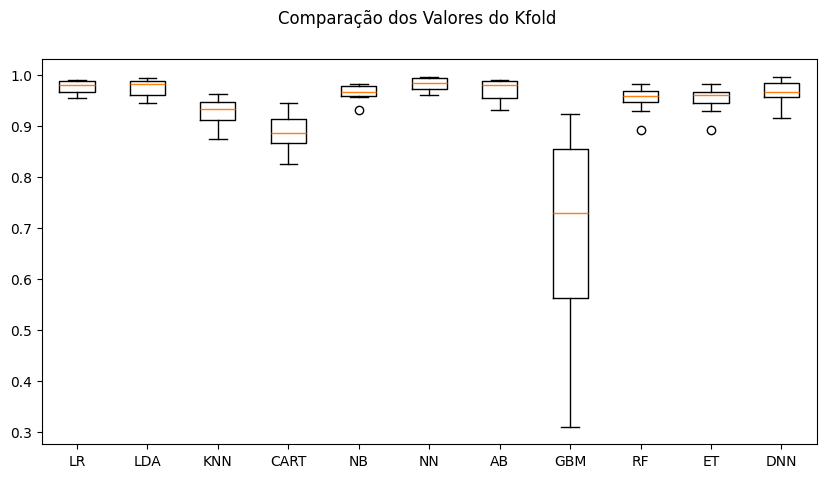

In [45]:
# comparando resultados da validação cruzada
# quanto maior o cross_val_score, o modelo é mais consistente e generalizável
fig = pyplot.figure()
fig.suptitle('Comparação dos Valores do Kfold')
ax = fig.add_subplot(111)
pyplot.boxplot(kfold_results) #(kfold_results[0:1] + kfold_results[2:11])
ax.set_xticklabels(names) #(names[0:1] + names[2:11])
fig.set_size_inches(10,5)
pyplot.savefig('grafic_image/kfold.png', format='png')
pyplot.show()

- Um valor maior de cross_val_score geralmente sugere que o modelo se adapta melhor aos dados e apresenta um desempenho superior na validação cruzada. 
- LDA apresenta o melhor resultado do kfold, dessa forma LDA será o escolhido para nosso trabalho nessa avaliação.

In [46]:
# fazendo predição com dados de test
# apurando a acurácia do modelo
# resultados com o conjunto de teste

# estimar acurácia do conjunto de validação 
Y_pred = lda_model.predict(X_test) 
print(accuracy_score(Y_test, Y_pred))

0.9994008388256441


- O nível da acurácia foi de 0.99 ou 99%, níveis entre 70% e 100%, pode-se considerar que há alta precisão dos resultados e baixo risco de erro.
- Assim a acurácia do nosso trabalho ficando em 99% é uma ótima acurácia continuando a aprovar o modelo LDA a ser escolhido em nosso trabalho.

In [47]:
# gera a matriz de confusão para análise
# a soma da diagonal principal sobre a soma total é o percentual de acerto (acurácia)
cnf_matrix = confusion_matrix(Y_test, Y_pred)
cnf_matrix

array([[56648,     8],
       [   26,    64]], dtype=int64)

- A matriz de confusão traz os valores onde podemos confirmar nossa acurácia: somando-se a diagonal principal e dividindo pela soma total DiagonalPrincipal / (DiagonalPrincipal + DiagonalSecundaria) da matriz de confusão chegamos ao valor de 0.99 ou 99%.

<Axes: >

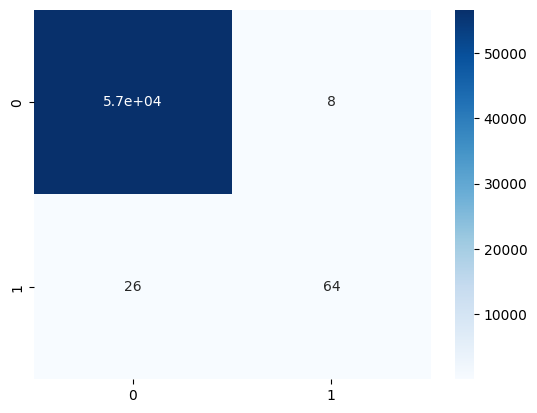

In [48]:
# plota o gráfico da matriz de confusão
sns.heatmap(cnf_matrix, annot=True, cmap='Blues')

- Pelas cores plotadas dos valores da matriz de confusão, observamos a predominância da cor escura (maior valor) em TP, somando-se TP e TN temos uma diagonal principal com maior valor.

In [49]:
# visualiza a predição de y
print(Y_pred)

[0 0 0 ... 0 0 0]


In [50]:
# transformando array em dataframe
df_pred = pd.DataFrame(Y_pred)

In [51]:
# renomeia as colunas de resultado da predição
df_pred.columns = ['fraude']

In [52]:
# visualizando os dados da predição - qtde de transações com possíveis fraudes = 1.0
df_pred.value_counts()

fraude
0         56674
1            72
Name: count, dtype: int64

In [53]:
# visualizando os dados da predição com a proporção percentual - % de fraudes - 1.0
df_pred.value_counts(normalize=True)*100, '%'

(fraude
 0         99.873119
 1          0.126881
 Name: proportion, dtype: float64,
 '%')

- Nessa predição feita sobre a amostra de teste (Y_test) mostra o percentual de transações integras - 0.0 e com fraude - 1.0.

In [54]:
# junta o df da predição dos percentuais com o df de dados originais
df_fraud = pd.concat([df_fraud, df_pred], axis=1)

In [55]:
# verifica as primeiras linhas do novo dataframe juntado
df_fraud.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V14,V16,V17,V18,V19,Class,fraude
0,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,0.09,-0.55,-0.62,-0.31,-0.47,0.21,0.03,0.40,0,0.0
1,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,-0.17,1.61,1.07,-0.14,0.46,-0.11,-0.18,-0.15,0,0.0
2,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,0.21,0.62,0.07,-0.17,-2.89,1.11,-0.12,-2.26,0,0.0
3,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,-0.05,-0.23,0.18,-0.29,-1.06,-0.68,1.97,-1.23,0,0.0
4,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,0.75,-0.82,0.54,-1.12,-0.45,-0.24,-0.04,0.80,0,0.0


In [56]:
# aqui vamos fazer a predição de integridade e fraude em percentual de cada linha da amostra
y_pred_proba = lda_model.predict_proba(X_test) 

In [57]:
# visualiza a predição das probabilidades de integridade e fraude
print(y_pred_proba)

[[1.00000000e+000 2.52383749e-136]
 [1.00000000e+000 1.08437024e-137]
 [1.00000000e+000 2.58648801e-135]
 ...
 [1.00000000e+000 1.88546714e-136]
 [1.00000000e+000 9.13074928e-134]
 [1.00000000e+000 3.20113451e-137]]


In [58]:
# transforma array em dataframe
df_fraud_proba = pd.DataFrame(y_pred_proba)

In [59]:
# renomeia as colunas de resultado do predict_proba
df_fraud_proba.columns = ['%integro', '%fraude']

In [60]:
# arredonda os resultados com duas casas decimais
df_fraud_proba = round(df_fraud_proba*100, 2)

In [61]:
# soma o total de percentuais para checar se fecha em 100%
df_fraud_proba['soma_perc'] = df_fraud_proba['%integro'] + df_fraud_proba['%fraude']

In [69]:
# exibe o dataframe de cada classe de período para checar os percentuais
df_fraud_proba[(df_fraud_proba['%fraude']>0) & (df_fraud_proba['%fraude']<100)].head(10)

,%integro,%fraude,soma_perc
13075,0.02,99.98,100.0
38564,99.86,0.14,100.0
39454,0.34,99.66,100.0
49021,94.27,5.73,100.0


- Através do predict_proba podemos definir o percentual de cada linha de ocorrer fraude e ao mesmo tempo de ocorrer a transação íntegra com relação ao pagamento com cartão.

In [63]:
# junta o df da predição dos percentuais com o df de dados originais
df_fraud = pd.concat([df_fraud, df_fraud_proba], axis=1)

In [64]:
# verifica as primeiras linhas do novo dataframe juntado
df_fraud.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V14,V16,V17,V18,V19,Class,fraude,%integro,%fraude,soma_perc
0,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,0.09,-0.55,-0.62,-0.31,-0.47,0.21,0.03,0.40,0,0.0,100.0,0.0,100.0
1,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,-0.17,1.61,1.07,-0.14,0.46,-0.11,-0.18,-0.15,0,0.0,100.0,0.0,100.0
2,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,0.21,0.62,0.07,-0.17,-2.89,1.11,-0.12,-2.26,0,0.0,100.0,0.0,100.0
3,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,-0.05,-0.23,0.18,-0.29,-1.06,-0.68,1.97,-1.23,0,0.0,100.0,0.0,100.0
4,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,0.75,-0.82,0.54,-1.12,-0.45,-0.24,-0.04,0.80,0,0.0,100.0,0.0,100.0


## Faz o Deploy do Modelo

In [65]:
# faz o deploy do modelo para ser utilizado posteriormente
from joblib import dump

dump(lda_model, 'model/LDA_fraud_model.pkl')

['model/LDA_fraud_model.pkl']